<a href="https://colab.research.google.com/github/JordiVillaFreixa/ORcode/blob/main/MPISolverLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using MPSolver for linear programming tasks
(based on the [MPSolver tutorial](https://developers.google.com/optimization/lp/lp_example))

Testing the solver for exercises in the [presentation on linear programming](https://www.slideshare.net/JordiVilliFreixa/unit2-linear-programming-251297454) at the study abroad [course in OR](https://mon.uvic.cat/cbbl/teaching/operational-research/) at UVic-UCC

## Plot the feasible region

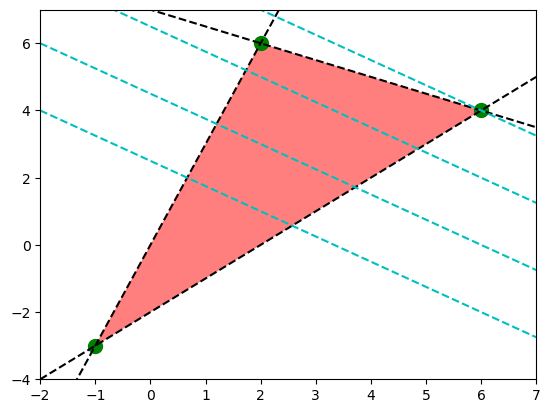

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Import the 'solve' and 'Symbol' functions from the sympy library
from sympy.solvers import solve
from sympy import Symbol

# Define the linear functions
def f1(x):
    return 7.-0.5*x
def f2(x):
    return 3.*x
def f3(x):
    return x-2.0
def of(x,b):
    return -3/4*x+b/4

# Define x as a symbol
x = Symbol('x')

# Solve for the intersection points of the pairs of functions
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))

# Calculate the y-coordinates of the intersection points
y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)

# Find minimum and maximum values for x and y of the intersection points
x_min = float(min(x1, x2, x3))-1.
x_max = float(max(x1, x2, x3))+1.
y_min = float(min(y1, y2, y3))-1.
y_max = float(max(y1, y2, y3))+1.


# Plot each intersection point
plt.plot(x1,f1(x1),'go',markersize=10)
plt.plot(x2,f1(x2),'go',markersize=10)
plt.plot(x3,f2(x3),'go',markersize=10)

# Fill the area enclosed by the three functions
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

# Create a range of x-values using linspace for each function
xr = np.linspace(int(x_min),int(x_max),100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)

# Plot each function with a dashed line type
plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')

# Plot isocontour lines for the objective function
for b in [10,18,26,34]:
    ofr=of(xr,b)
    plt.plot(xr,ofr,'c--')

# Set the x and y limits of the plot
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

# Show the plot
plt.show()

## solve the LP problem using the OR solver

In [17]:
# Import the necessary library
from ortools.linear_solver import pywraplp

# Create the solver object
solver = pywraplp.Solver.CreateSolver('GLOP')

# Define the decision variables and their bounds
x = solver.NumVar(0, solver.infinity(), 'x')
y = solver.NumVar(0, solver.infinity(), 'y')

# Display the number of variables
print('Number of variables =', solver.NumVariables())

# Add constraints to the problem
solver.Add(x + 2 * y <= 14.0) # Constraint 0: x + 2y <= 14.
solver.Add(3 * x - y >= 0.0)  # Constraint 1: 3x - y >= 0.
solver.Add(x - y <= 2.0)     # Constraint 2: x - y <= 2.

# Display the number of constraints
print('Number of constraints =', solver.NumConstraints())

# Define the objective function
solver.Maximize(3 * x + 4 * y) # Objective function: 3x + 4y

# Solve the problem and check the status of the solution
status = solver.Solve()

# Display the solution if it is optimal
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
    
# Display an error message if the solution is not optimal
else:
    print('The problem does not have an optimal solution.')

Number of variables = 2
Number of constraints = 3
Solution:
Objective value = 33.99999999999999
x = 5.999999999999998
y = 3.9999999999999996
